In [1]:
import vmd_contact
import matplotlib
import matplotlib.pyplot as plt
import warnings
import numpy as np
warnings.filterwarnings('ignore')
font = {'size': 12,'weight':'bold'}
#font= {"family":"Courier New"}
matplotlib.rc('font', **font)
from scipy.signal import savgol_filter
import os

In [2]:
peptides = ['aekdel','taekdel']
receptor_chain_ID = 'A'
stride = 1
rec_resids = [5,165,169]
lig_resids = [5,6]
def wrapper(top_pdb, traj_dcd, ligand_chain_ID, receptor_resids,lig_resids):
    step = vmd_contact.Distance(top_pdb, receptor_chain_ID, ligand_chain_ID, traj_dcd, stride,receptor_resids,lig_resids)
    distance_matrix,receptor_labels,ligand_labels = step.contact_dist_vmd()
    return distance_matrix,receptor_labels,ligand_labels
def rewrite_ligand_labels(ligand_labels):
    new_labels = []
    for l in ligand_labels:
        new_labels.append("%3d"%(0-int(l.split()[0]))+' '+l.split()[1])
    return new_labels

In [3]:
whole_xlabels = {}
whole_ylabels = {}
whole_data = {}
for pep in peptides:
    if pep =='aekdel':
        pdb_file = 'KDEL_'+pep+'_restrain_Resi4.pdb' 
        traj_file = 'KDEL_xtal_restrain.dcd'
        lig_chain_ID = 'B'
        distance_matrix,receptor_labels,ligand_labels = wrapper(pdb_file, traj_file, lig_chain_ID, rec_resids,lig_resids)
        whole_data[pep] = distance_matrix
        whole_xlabels[pep] = receptor_labels
        whole_ylabels[pep] = ligand_labels
        
        traj_file = 'KDEL_xtal_restrain_rep1.dcd'
        distance_matrix,receptor_labels,ligand_labels = wrapper(pdb_file, traj_file, lig_chain_ID, rec_resids,lig_resids)
        whole_data[pep+'_rep1'] = distance_matrix
        whole_xlabels[pep+'_rep1'] = receptor_labels
        whole_ylabels[pep+'_rep1'] = ligand_labels
        
        traj_file = 'KDEL_xtal_restrain_rep2.dcd'
        distance_matrix,receptor_labels,ligand_labels = wrapper(pdb_file, traj_file, lig_chain_ID, rec_resids,lig_resids)
        whole_data[pep+'_rep2'] = distance_matrix
        whole_xlabels[pep+'_rep2'] = receptor_labels
        whole_ylabels[pep+'_rep2'] = ligand_labels
    else:
        pdb_file = 'KDEL_'+pep+'_restrain_Resi4.pdb' 
        traj_file = os.path.join('/home/bxie/PycharmProjects/KDEL/kdel_simulation/TAEKDEL_new/TAEKDEL_new.dcd')
        distance_matrix,receptor_labels,ligand_labels = wrapper(pdb_file, traj_file, lig_chain_ID, rec_resids,lig_resids)
        whole_data[pep] = distance_matrix
        whole_xlabels[pep] = receptor_labels
        whole_ylabels[pep] = ligand_labels

  0%|          | 0/3 [00:00<?, ?it/s]

range 5 to 169 residues are used for calculating contact frequency.


  0%|          | 0/3 [00:00<?, ?it/s]

range 5 to 169 residues are used for calculating contact frequency.


  0%|          | 0/3 [00:00<?, ?it/s]

range 5 to 169 residues are used for calculating contact frequency.


  0%|          | 0/3 [00:00<?, ?it/s]

range 5 to 169 residues are used for calculating contact frequency.


100%|██████████| 3/3 [00:44<00:00, 14.71s/it]


In [4]:
print (pdb_file)
print (traj_file)

KDEL_taekdel_restrain_Resi4.pdb
/home/bxie/PycharmProjects/KDEL/kdel_simulation/TAEKDEL_new/TAEKDEL_new.dcd


In [5]:
#print (whole_data['aekdel'].shape)
#print (whole_data['aekdel_rep1'].shape)
#print (whole_data['aekdel_rep2'].shape)
#print (whole_data['taekdel'].shape)

In [6]:
for key in whole_data.keys():
    for (i, x ) in enumerate(whole_xlabels[key]):
        print (i,x)

0   5 ARG
1 165 ASN
2 169 ARG
0   5 ARG
1 165 ASN
2 169 ARG
0   5 ARG
1 165 ASN
2 169 ARG
0   5 ARG
1 165 ASN
2 169 ARG


In [7]:
for (i, x ) in enumerate(whole_ylabels['aekdel']):
    print (i,x)
for (i, x ) in enumerate(whole_ylabels['taekdel']):
    print (i,x)

0   5 ASP
1   6 GLU
0   5 ASP
1   6 GLU


In [8]:
#rec_id = 168
#lig_id = 3
#print (whole_xlabels['aekdel'][rec_id])
#print (whole_ylabels['aekdel'][lig_id])


#print (len(dist))

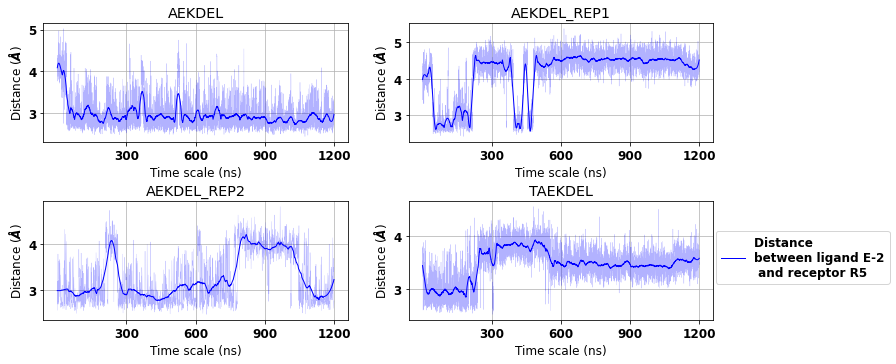

In [9]:
rec_id = 0
lig_id = 1
plot_index = 1
dist_5_2={}
plt.figure(figsize=(12,12))
for key in whole_data.keys():
    plt.subplot(len(whole_data.keys()), 2, plot_index)
    dist_5_2[key] = whole_data[key][:,rec_id,lig_id]
    plt.plot(dist_5_2[key],lw=0.3,color='blue', alpha=0.3)
    plt.plot(savgol_filter(dist_5_2[key], 151,3),lw=1,label = 'Distance \nbetween ligand E-2\n and receptor R5',color='blue')
    plt.title(key.upper())    
    plt.grid(axis='y',alpha=0.9)
    plt.grid(axis='x',alpha=0.9)
    plt.ylabel('Distance ($\AA$)')
    if not 'rep2' in key:
        plt.xticks([1250,2500,3750,5000],['300','600','900','1200'])
    else:
        plt.xticks([500,1000,1500,2000],['300','600','900','1200'])
    plt.xlabel('Time scale (ns)')
    plot_index+=1
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.subplots_adjust(hspace = 0.5)
plt.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(1.6, 0.8))
plt.show()


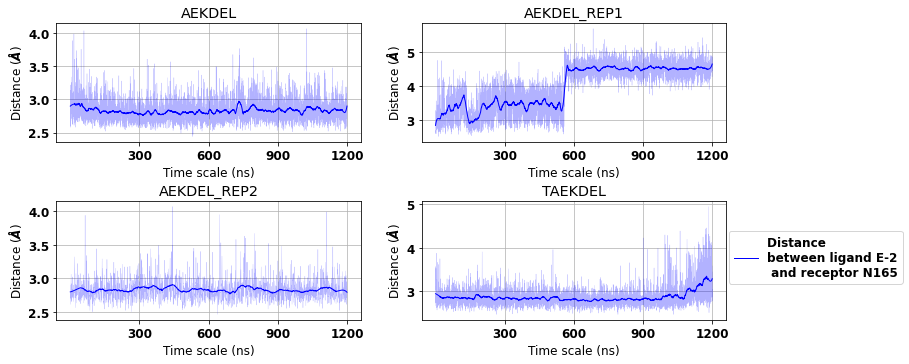

In [10]:
rec_id = 1
lig_id = 1
plot_index = 1
plt.figure(figsize=(12,12))
dist_165_2 ={}
for key in whole_data.keys():
    plt.subplot(len(whole_data.keys()), 2, plot_index)
    dist_165_2[key] = whole_data[key][:,rec_id,lig_id]
    plt.plot(dist_165_2[key],lw=0.3,color='blue', alpha=0.3)
    plt.plot(savgol_filter(dist_165_2[key], 151,3),lw=1,label = 'Distance \nbetween ligand E-2\n and receptor N165',color='blue')
    plt.title(key.upper())    
    plt.grid(axis='y',alpha=0.9)
    plt.grid(axis='x',alpha=0.9)
    plt.ylabel('Distance ($\AA$)')
    if not 'rep2' in key:
        plt.xticks([1250,2500,3750,5000],['300','600','900','1200'])
    else:
        plt.xticks([500,1000,1500,2000],['300','600','900','1200'])
    plt.xlabel('Time scale (ns)')
    plot_index+=1
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.subplots_adjust(hspace = 0.5)
plt.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(1.6, 0.8))
plt.show()

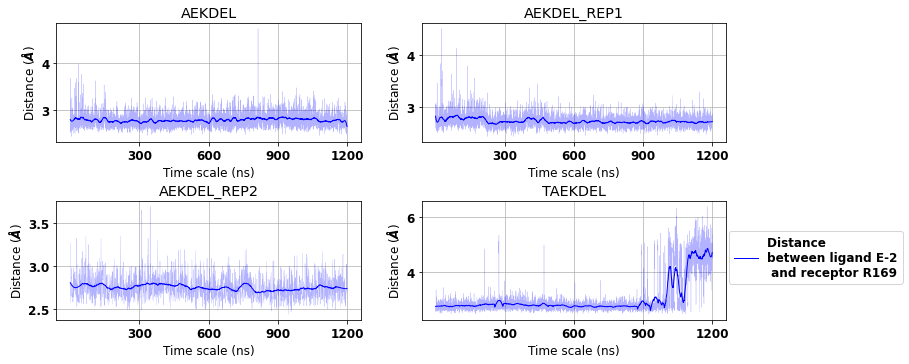

In [11]:
rec_id = 2
lig_id = 1
plot_index = 1
plt.figure(figsize=(12,12))
dist_169_2={}
for key in whole_data.keys():
    plt.subplot(len(whole_data.keys()), 2, plot_index)
    dist_169_2[key] = whole_data[key][:,rec_id,lig_id]
    plt.plot(dist_169_2[key],lw=0.3,color='blue', alpha=0.3)
    plt.plot(savgol_filter(dist_169_2[key], 151,3),lw=1,label = 'Distance \nbetween ligand E-2\n and receptor R169',color='blue')
    plt.title(key.upper())    
    plt.grid(axis='y',alpha=0.9)
    plt.grid(axis='x',alpha=0.9)
    plt.ylabel('Distance ($\AA$)')
    if not 'rep2' in key:
        plt.xticks([1250,2500,3750,5000],['300','600','900','1200'])
    else:
        plt.xticks([500,1000,1500,2000],['300','600','900','1200'])
    plt.xlabel('Time scale (ns)')
    plot_index+=1
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.subplots_adjust(hspace = 0.5)
plt.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(1.6, 0.8))
plt.show()

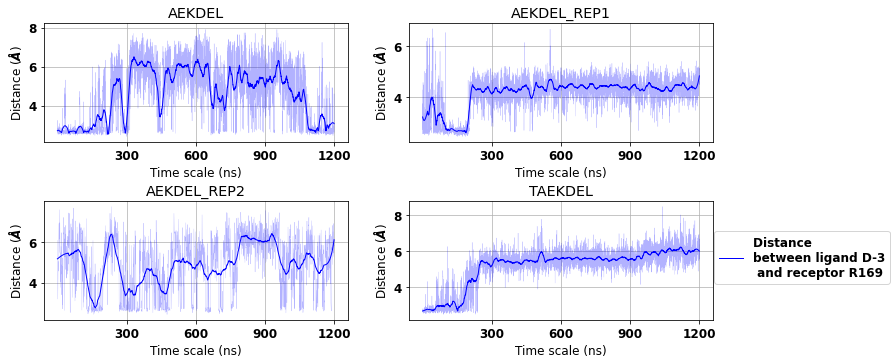

In [12]:
rec_id = 2
lig_id = 0
plot_index = 1
plt.figure(figsize=(12,12))
dist_169_3={}
for key in whole_data.keys():
    plt.subplot(len(whole_data.keys()), 2, plot_index)
    dist_169_3[key] = whole_data[key][:,rec_id,lig_id]
    plt.plot(dist_169_3[key],lw=0.3,color='blue', alpha=0.3)
    plt.plot(savgol_filter(dist_169_3[key], 151,3),lw=1,label = 'Distance \nbetween ligand D-3\n and receptor R169',color='blue')
    plt.title(key.upper())    
    plt.grid(axis='y',alpha=0.9)
    plt.grid(axis='x',alpha=0.9)
    plt.ylabel('Distance ($\AA$)')
    if not 'rep2' in key:
        plt.xticks([1250,2500,3750,5000],['300','600','900','1200'])
    else:
        plt.xticks([500,1000,1500,2000],['300','600','900','1200'])
    plt.xlabel('Time scale (ns)')
    plot_index+=1
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.subplots_adjust(hspace = 0.5)
plt.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(1.6, 0.8))
plt.show()

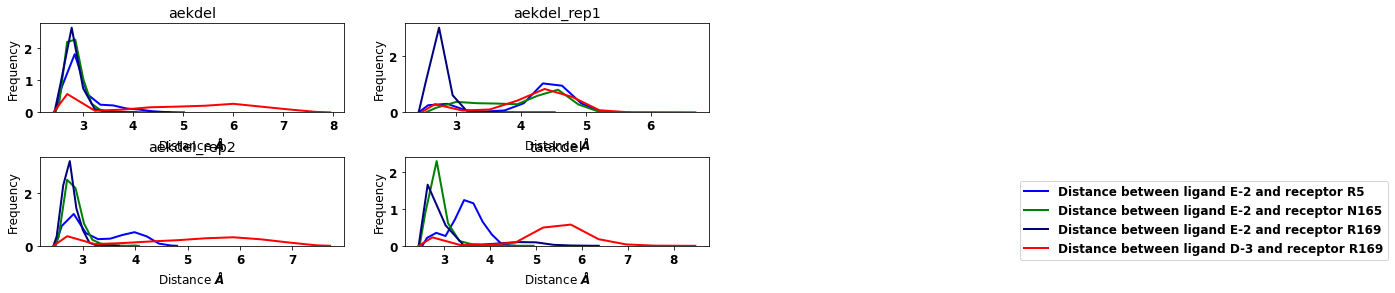

In [13]:
colors = ['blue','green','navy','red']
total_dat = [dist_5_2,dist_165_2,dist_169_2,dist_169_3]
contextes = ['ligand E-2 and receptor R5','ligand E-2 and receptor N165','ligand E-2 and receptor R169','ligand D-3 and receptor R169']

def hist1D(data, index,label_text):
    n,bins,patches = plt.hist(data,density=True, alpha=0.0,stacked=True)
    bincenters = [bins[0]]
    tem = 0.5 * (bins[1:]+bins[:-1])
    for b in tem:
        bincenters.append(b)
    bincenters.append(bins[-1])
    values = [0]
    for _n in n:
        #values.append(float(_n)/np.sum(n))
        values.append(float(_n))
    values.append(0)
    plt.plot([b for b in bincenters], values, linewidth=2,color= colors[index],label = label_text)
    return

plot_index=1
plt.figure(figsize=(12,9))
for key in dist_5_2.keys():
    plt.subplot(len(dist_5_2.keys()),2, plot_index)
    for i in range(4):  ## 4 types of distsance
        dist = total_dat[i][key]
        label_context = 'Distance between '+contextes[i]
        hist1D(dist, i, label_context)
    plt.title(key)
    plt.xlabel('Distance '+r'$\AA$')
    plt.ylabel('Frequency')
    plot_index+=1
    #plt.ylim(0,1)

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(2, 0.8))
plt.subplots_adjust(hspace=0.5)
plt.show()


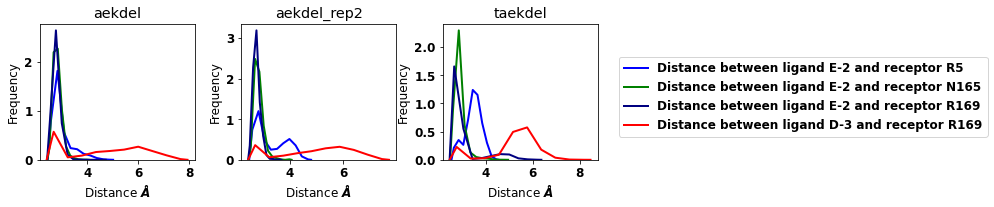

In [14]:
plot_index=1
plt.figure(figsize=(10,2.5))
for key in dist_5_2.keys():
    if not 'rep1' in key:
        plt.subplot(1,len(dist_5_2.keys())-1, plot_index)
        for i in range(4):  ## 4 types of distsance
            dist = total_dat[i][key]
            label_context = 'Distance between '+contextes[i]
            hist1D(dist, i, label_context)
        plt.title(key)
        plt.xlabel('Distance '+r'$\AA$')
        plt.ylabel('Frequency')
        plot_index+=1
        #plt.ylim(0,1)

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(1.1, 0.8))
plt.subplots_adjust(wspace=0.3)
plt.show()

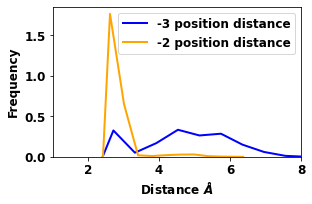

In [16]:
colors = ['blue','orange']
total_dat = [dist_169_2,dist_169_3]

whole_dist_169_3 =[]
for key in dist_169_3.keys():
    for d in dist_169_3[key]:
        whole_dist_169_3.append(d)

whole_dist_2 = []
for key in dist_169_2.keys(): # traj name
    for d in dist_169_2[key]:
    #for nframe in range(len(dist_169_2[key])): # for each frame
        whole_dist_2.append(d)
        #tem = [dist_5_2[key][nframe], dist_165_2[key][nframe], dist_169_2[key][nframe]]
        #whole_dist_2.append(np.min(tem))
    
def bootstrapping(data):
    total_data =[]
    for _ in range(100): # repeat 100 times 
        random_number = np.random.choice(len(data), len(data))
        rearrange_data = [data[r] for r in random_number]
        for r in rearrange_data:
            total_data.append(r)
    return total_data


plot_index=1
plt.figure(figsize=(4.5,3))
dist = bootstrapping(whole_dist_169_3)
label_context = '-3 position distance'
hist1D(dist, 0, label_context)

dist_2 = bootstrapping(whole_dist_2)
label_context = '-2 position distance'
hist1D(dist_2, -1, label_context)

plt.xlabel('Distance '+r'$\AA$', **font)
plt.ylabel('Frequency', **font)
plt.xlim(1,8)

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
#plt.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(1.1, 0.8))
plt.legend(loc="upper right")
plt.tight_layout()
plt.savefig('/home/bxie/distance.png')
plt.show()